In [12]:
import tensorflow as tf
import numpy as np
# Question 1
X= tf.random.normal(
    shape=(2,3),
    mean=4,
    stddev=0.5,
    dtype='float64'
)
R = np.arange(12.0,150.0,3)
Yarr= np.random.choice(R,6)
Y = tf.reshape(Yarr,[2,3])
Z= X+Y
sess=tf.Session()
print(sess.run(X))
print(sess.run(Y))
print(sess.run(Z))

[[3.45249796 4.23468287 3.70465581]
 [4.01785576 4.84849937 3.95882836]]
[[ 60.  57. 138.]
 [ 57.  42. 108.]]
[[ 64.01430476  61.5738391  142.38460898]
 [ 61.3948336   46.14701662 112.44202021]]


In [13]:
# Question 2
W = tf.tanh(Z)
T = tf.sigmoid(Z)
print(sess.run(W))
print(sess.run(T))

[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [14]:
## Question 3
# Replacing sigmoid/tanh with another(new) activation function that is ( exp^(f) - exp^(-f) )/( exp^(f) + exp^(-f) ) + (1 / ( 1 + exp^(-f) ))
import tensorflow as tf
W = tf.random_normal(shape=(3,2))
X = tf.constant([2,4], dtype=tf.float32)
B = tf.zeros(shape=(2))
f = W*X + B
newActivationResult = tf.sigmoid(f) # this line has been changed with new activation function sigmoid
with tf.Session() as sess:
    output = sess.run(newActivationResult)
    print(output)


#If we want to replace new activation function with sigmoid, line 8 has to be changed as above

[[0.85248625 0.44476515]
 [0.7671976  0.20839438]
 [0.85610294 0.03111615]]


In [15]:
# Question 4
import tensorflow as tf
import numpy as np
inp = tf.placeholder(shape=(1, 32, 32, 3), dtype=tf.float32)
output = 2*inp + 5
with tf.Session() as sess:
    network_input = np.random.randint(5,  size=(256, 3))
    network_input = np.resize(network_input, (1, 32,32, 3))
    out = sess.run(output, feed_dict = {inp: network_input})
    print(out)
    
    
 # Please describe the steps in 3 lines

[[[[11. 13. 13.]
   [11. 13.  9.]
   [11.  5.  7.]
   ...
   [ 7. 13. 13.]
   [ 7. 11.  7.]
   [ 5. 11.  9.]]

  [[11.  9.  5.]
   [ 5. 13.  9.]
   [ 5.  5.  5.]
   ...
   [11.  7. 13.]
   [ 5.  7.  9.]
   [ 7.  9. 13.]]

  [[13. 11. 13.]
   [ 7. 13.  7.]
   [ 5.  5. 11.]
   ...
   [ 7. 11.  7.]
   [ 9. 13. 13.]
   [ 5.  9.  9.]]

  ...

  [[11. 11.  7.]
   [ 5.  7. 13.]
   [ 9.  5.  9.]
   ...
   [11. 13.  7.]
   [ 9.  5.  9.]
   [ 7. 13. 11.]]

  [[ 7.  5.  7.]
   [11. 13.  9.]
   [ 5. 13.  7.]
   ...
   [ 5. 13.  5.]
   [ 9. 11.  5.]
   [ 5.  9.  9.]]

  [[ 9.  5.  5.]
   [13.  7. 13.]
   [ 9.  7. 11.]
   ...
   [ 7. 13.  9.]
   [13.  9. 11.]
   [13.  9.  7.]]]]


A tensorflow placeholder 'inp' of shape=(1, 32, 32, 3) has been declared for the computation graph whose value will be fed later. 'output' is a tensor that is 'inp' multiplied by 2 and 5 added to the product. tensorflow Session is created as
'sess' . (256,3) shape array of  random ints below 5 is created and reshaped to the size of placeholder   'inp'. 'out' is the finally printed which is resultant of running 'output' with computational graph by session.

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.6683 - acc: 0.8581 - val_loss: 0.1691 - val_acc: 0.9507
Epoch 2/20
60000/60000 [==============================] - 15s 255us/step - loss: 0.2219 - acc: 0.9341 - val_loss: 0.1283 - val_acc: 0.9608
Epoch 3/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.1795 - acc: 0.9456 - val_loss: 0.1096 - val_acc: 0.9657
Epoch 4/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1544 - acc: 0.9545 - val_loss: 0.0981 - val_acc: 0.9704
Epoch 5/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.1378 - acc: 0.9584 - val_loss: 0.0919 - val_acc: 0.9722
Epoch 6/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1255 - acc: 0.9618 - val_loss: 0.0871 - val_acc: 0.9747
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1161 - acc: 0.9654 - val_loss: 0.0847

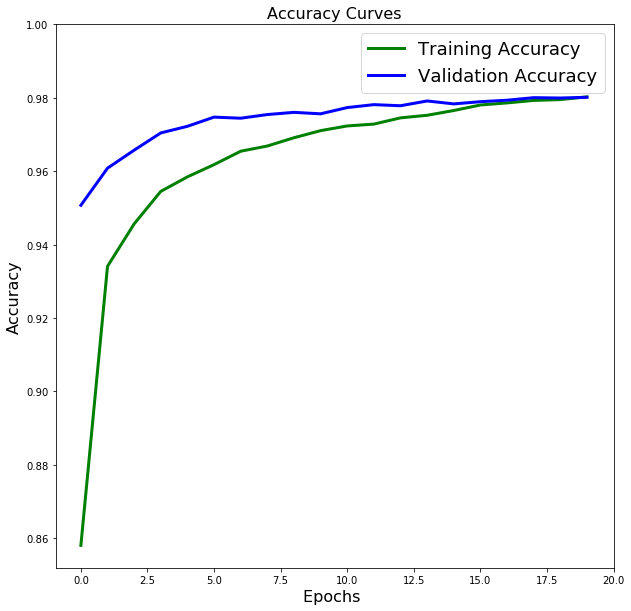

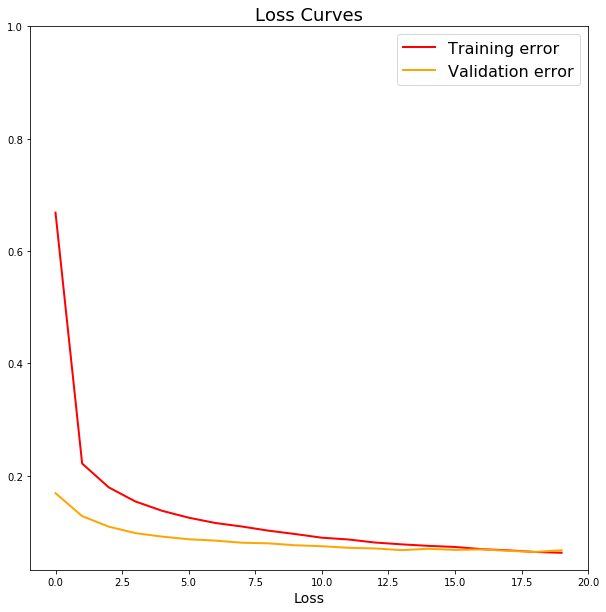

In [82]:
# Question 5
#Build an image(digit) classifier using keras for MNIST data using adagrad, 'binary_crossentropy' using MLP (not CNN

from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import advanced_activations

(X_train,y_train),(X_test,y_test)=mnist.load_data()

#Normalization
X_train =(X_train- np.mean(X_train))/X_train.std()
X_test =(X_test-  np.mean(X_test))/X_test.std()



X_train_dim = X_train.reshape(X_train.shape[0],784)
X_test_dim = X_test.reshape(X_test.shape[0],784)
# change datatype

#labels to categorical vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#print(y_test)
num_classes=10
inputShape=np.prod(X_train.shape[1:])
activation_fn=advanced_activations.LeakyReLU(alpha=0.003)

model = Sequential()
model.add(Dense(512,activation=activation_fn,input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512,activation=activation_fn))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adagrad',loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train_dim,y_train,batch_size=256,epochs=20,verbose=1,validation_data=(X_test_dim,y_test))

# predict one output
cls_0=np.argmax(model.predict(X_test_dim[[0]]))
print(cls_0)

# Plot the Accuracy Curves
plt.figure(figsize=[10, 10])
plt.plot(history.history['acc'], 'green', linewidth=3.0)
plt.plot(history.history['val_acc'], 'blue', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xlim(right=20)
plt.ylim(top=1)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

#plot loss

plt.figure(figsize=[10,10])
plt.plot(history.history['loss'],'red',linewidth=2.0)
plt.plot(history.history['val_loss'],'orange',linewidth=2.0)
plt.legend(['Training error','Validation error'],fontsize=16)
plt.xlabel('Epochs',fontsize=14)
plt.xlabel('Loss',fontsize=14)
plt.xlim(right=20)
plt.ylim(top=1)
plt.title('Loss Curves',fontsize=18)
plt.show()